# Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
#data preprocessing
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [46]:
data.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
classes = data['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

Class
0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

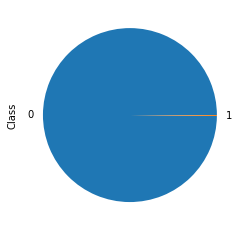

In [10]:
print((data.groupby('Class')['Class'].count()) )
((data.groupby('Class')['Class'].count()/data['Class'].count())*100).plot.pie()

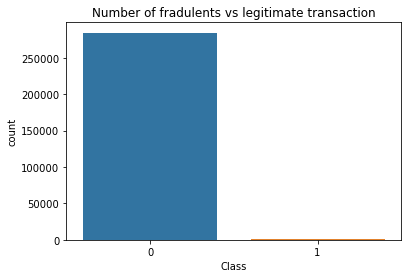

In [11]:
sns.countplot(x='Class',data=data)
plt.title("Number of fradulents vs legitimate transaction")
plt.show()


## Outliers treatments

No outlier treatment as the dat ahas been already edited by PCA

ANALYZING THE RELATIONSHIP BETWEEN TIME AND CLASS COLUMNS

In [12]:
data_fraud = data[data['Class']==1]
data_legitimate = data[data['Class'] == 0]


[Text(0.5, 0, 'Seconds elapsed betwwen conseutive transaction')]

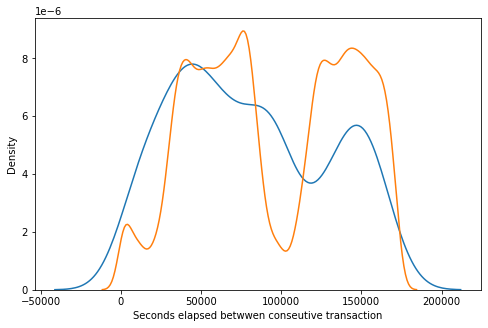

In [14]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraud',hist=False)
ax = sns.distplot(data_legitimate['Time'],label='fraud',hist=False)
ax.set(xlabel="Seconds elapsed betwwen conseutive transaction")


In [15]:
## Conclusion : Time variable donot play any specific role in deciding whether the transaction is fraud or not/

In [16]:
data.drop('Time',axis=1,inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
x = data.drop(['Class'],axis=1)


In [65]:
y = data['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
#we are using standard scaler to scale the value o amount all the other columns are PCA tranformed
x_train['Amount'] = scaler.fit_transform(x_train[['Amount']])

In [70]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [72]:
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])

In [73]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logistic = LogisticRegression(C=0.01)

In [76]:
logistic_model = logistic.fit(x_train, y_train)

In [80]:
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(x_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(x_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

------------------ Confusion Matrix --------------------
[[53563  3303]
 [   31    65]]


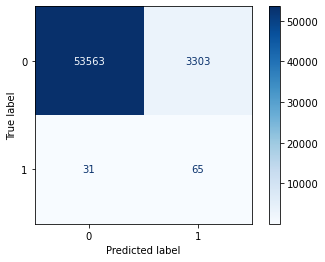

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.68      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.81      0.50     56962
weighted avg       1.00      0.94      0.97     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9414697517643341
Sensitivity:- 0.6770833333333334
Specificity:- 0.9419160834241902
F1-Score:- 0.037528868360277134
------------------ ROC --------------------


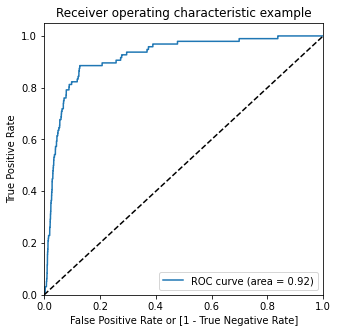

In [81]:
display_test_results("Logistic Reregssion",logistic_model)

## XgBoost

In [85]:
!pip install xgboost

In [87]:
from xgboost import XGBClassifier

In [88]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

In [90]:
xgb_model = XGBClassifier(params = params)
xgb_model.fit(x_train, y_train)

[16:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, ...)

------------------ Confusion Matrix --------------------
[[56850    16]
 [   24    72]]


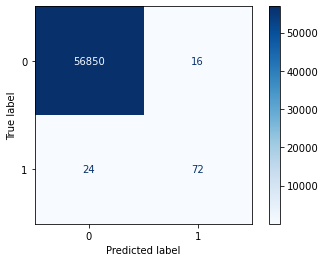

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.82      0.75      0.78        96

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9992977774656788
Sensitivity:- 0.75
Specificity:- 0.9997186367952731
F1-Score:- 0.7826086956521738
------------------ ROC --------------------


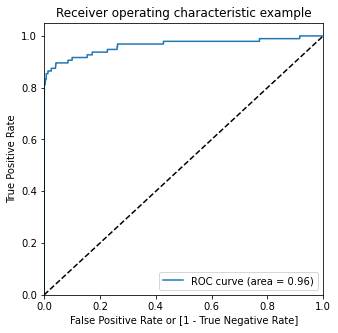

In [91]:
display_test_results("XG Boost", xgb_model)


In [99]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

------------------ Confusion Matrix --------------------
[[56836    30]
 [   40    56]]


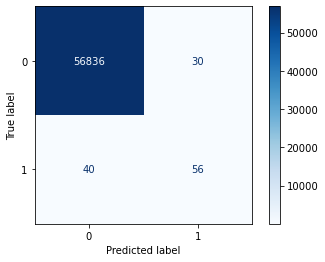

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.6153846153846155
------------------ ROC --------------------


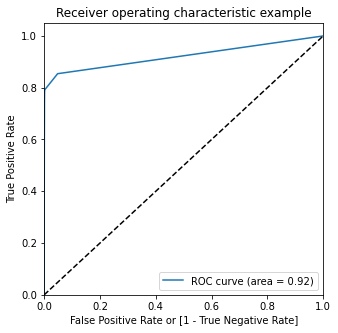

In [100]:
display_test_results("Decision Tree", decision_tree_model)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [104]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

------------------ Confusion Matrix --------------------
[[56840    26]
 [   34    62]]


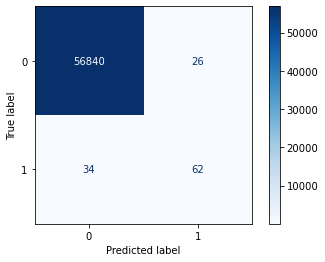

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.65      0.67        96

    accuracy                           1.00     56962
   macro avg       0.85      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9989466661985184
Sensitivity:- 0.6458333333333334
Specificity:- 0.9995427847923188
F1-Score:- 0.6739130434782609
------------------ ROC --------------------


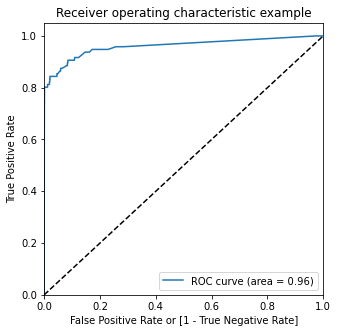

In [105]:
display_test_results("Random Forest",random_forest_model)

In [106]:
results.sort_values(by="ROC", ascending=False)

,Model Name,Accuracy,F1-score,ROC
1,XG Boost,0.999298,0.782609,0.963271
3,Random Forest,0.998947,0.673913,0.960554
2,Decision Tree,0.998771,0.615385,0.921750
0,Logistic Reregssion,0.941470,0.037529,0.917804
